In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set configurations
pd.set_option('display.max_columns', 100)
sns.set_style("white")

# model imports
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import pickle
import joblib

# NLP Imports
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ayaanhaque/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayaanhaque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# set configurations
pd.set_option('display.max_columns', 100)
sns.set_style("white")

In [4]:
model_data = pd.read_csv('../data/data_for_model.csv', keep_default_na=False)

In [5]:
# Cleaning the Text
def processing_text(series_to_process):
    new_list = []
    tokenizer = RegexpTokenizer(r'(\w+)')
    lemmatizer = WordNetLemmatizer()

    for i in range(len(series_to_process)):
        # tokenized item in a new list
        dirty_string = (series_to_process)[i].lower()
        words_only = tokenizer.tokenize(dirty_string) # words_only is a list of only the words, no punctuation
        #Lemmatize the words_only
        words_only_lem = [lemmatizer.lemmatize(i) for i in words_only]
        # removing stop words
        words_without_stop = [i for i in words_only_lem if i not in stopwords.words("english")]
        # return seperated words
        long_string_clean = " ".join(word for word in words_without_stop)
        new_list.append(long_string_clean)
        return new_list

In [6]:
#Vectorization : -

from sklearn.feature_extraction.text import TfidfVectorizer

X = model_data["megatext_clean"]
y = model_data['is_suicide']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

tvec_optimised = TfidfVectorizer(ngram_range=(1, 3),stop_words = 'english')
X_train_tvec = tvec_optimised.fit_transform(X).todense()
# X_test_tvec = tvec_optimised.transform(X_test).todense()

In [8]:
modelkmeans = KMeans(n_clusters=2, init='k-means++', n_init=100)
# modelkmeans = KMeans(2,1,100) figure out how to use this guys class
modelkmeans.fit(X_train_tvec)

KMeans(n_clusters=2, n_init=100)

NameError: name 'fitted' is not defined

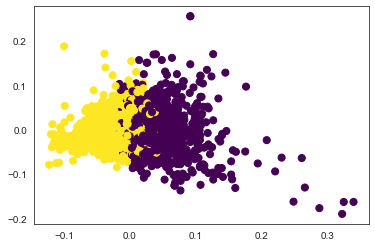

In [53]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X)

predicted_values = modelkmeans.predict(X_train_tvec)

# fitted = modelkmeans.fit(X_test_tvec)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

# centers = fitted.centroids once we get the Kmeans class working, we can graph centroids
centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [49]:
print(modelkmeans.inertia_)

1878.7917424456753


In [10]:
labels_np = modelkmeans.labels_

In [11]:
labels_np

array([1, 1, 0, ..., 1, 0, 1], dtype=int32)

In [13]:
model_data["Clustered Labels"] = labels_np

In [16]:
model_data.head()

,title,selftext,author,num_comments,is_suicide,url,selftext_clean,title_clean,author_clean,selftext_length,title_length,megatext_clean,Clustered Labels
0,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,SQLwitch,133,0,https://www.reddit.com/r/depression/comments/d...,understand people reply immediately op invitat...,broken least understood rule helper may invite...,sql witch,4792,144,sql witch understand people reply immediately ...,1
1,Regular Check-In Post,Welcome to /r/depression's check-in post - a p...,circinia,1644,0,https://www.reddit.com/r/depression/comments/e...,welcome r depression check post place take mom...,regular check post,c irc,650,21,c irc welcome r depression check post place ta...,1
2,I hate it so much when you try and express you...,I've been feeling really depressed and lonely ...,TheNewKiller69,8,0,https://www.reddit.com/r/depression/comments/f...,feeling really depressed lonely lately job ful...,hate much try express feeling parent turn arou...,new killer 69,1866,137,new killer 69 feeling really depressed lonely ...,0
3,I went to the hospital because I was having re...,I literally broke down crying and asked to go ...,Jazzlecrab,15,0,https://www.reddit.com/r/depression/comments/f...,literally broke cry asked go home another nurs...,went hospital wa really bad panic attack theyc...,jazz le crab,490,197,jazz le crab literally broke cry asked go home...,0
4,Cake day for me,Any kind soul want to give a depressed person ...,Depressed_Kid786,37,0,https://www.reddit.com/r/depression/comments/f...,kind soul want give depressed person karma edi...,cake day,depressed kid 786,176,15,depressed kid 786 kind soul want give depresse...,1


In [12]:
len(labels_np)

1897

In [17]:
# model_data.to_csv("clustered_labels.csv")

In [5]:
df = pd.read_csv('../data/clustered_labels.csv', keep_default_na=False)

In [6]:
df.head()

,Unnamed: 0,title,selftext,author,num_comments,is_suicide,url,selftext_clean,title_clean,author_clean,selftext_length,title_length,megatext_clean,Clustered Labels
0,0,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,SQLwitch,133,0,https://www.reddit.com/r/depression/comments/d...,understand people reply immediately op invitat...,broken least understood rule helper may invite...,sql witch,4792,144,sql witch understand people reply immediately ...,1
1,1,Regular Check-In Post,Welcome to /r/depression's check-in post - a p...,circinia,1644,0,https://www.reddit.com/r/depression/comments/e...,welcome r depression check post place take mom...,regular check post,c irc,650,21,c irc welcome r depression check post place ta...,1
2,2,I hate it so much when you try and express you...,I've been feeling really depressed and lonely ...,TheNewKiller69,8,0,https://www.reddit.com/r/depression/comments/f...,feeling really depressed lonely lately job ful...,hate much try express feeling parent turn arou...,new killer 69,1866,137,new killer 69 feeling really depressed lonely ...,0
3,3,I went to the hospital because I was having re...,I literally broke down crying and asked to go ...,Jazzlecrab,15,0,https://www.reddit.com/r/depression/comments/f...,literally broke cry asked go home another nurs...,went hospital wa really bad panic attack theyc...,jazz le crab,490,197,jazz le crab literally broke cry asked go home...,0
4,4,Cake day for me,Any kind soul want to give a depressed person ...,Depressed_Kid786,37,0,https://www.reddit.com/r/depression/comments/f...,kind soul want give depressed person karma edi...,cake day,depressed kid 786,176,15,depressed kid 786 kind soul want give depresse...,1


In [8]:
df.head(10)

,Unnamed: 0,title,selftext,author,num_comments,is_suicide,url,selftext_clean,title_clean,author_clean,selftext_length,title_length,megatext_clean,Clustered Labels
0,0,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,SQLwitch,133,0,https://www.reddit.com/r/depression/comments/d...,understand people reply immediately op invitat...,broken least understood rule helper may invite...,sql witch,4792,144,sql witch understand people reply immediately ...,1
1,1,Regular Check-In Post,Welcome to /r/depression's check-in post - a p...,circinia,1644,0,https://www.reddit.com/r/depression/comments/e...,welcome r depression check post place take mom...,regular check post,c irc,650,21,c irc welcome r depression check post place ta...,1
2,2,I hate it so much when you try and express you...,I've been feeling really depressed and lonely ...,TheNewKiller69,8,0,https://www.reddit.com/r/depression/comments/f...,feeling really depressed lonely lately job ful...,hate much try express feeling parent turn arou...,new killer 69,1866,137,new killer 69 feeling really depressed lonely ...,0
3,3,I went to the hospital because I was having re...,I literally broke down crying and asked to go ...,Jazzlecrab,15,0,https://www.reddit.com/r/depression/comments/f...,literally broke cry asked go home another nurs...,went hospital wa really bad panic attack theyc...,jazz le crab,490,197,jazz le crab literally broke cry asked go home...,0
4,4,Cake day for me,Any kind soul want to give a depressed person ...,Depressed_Kid786,37,0,https://www.reddit.com/r/depression/comments/f...,kind soul want give depressed person karma edi...,cake day,depressed kid 786,176,15,depressed kid 786 kind soul want give depresse...,1
5,5,sorry but why the fuck is life like this,literally though. have i done anything wrong,angelshum10,13,0,https://www.reddit.com/r/depression/comments/f...,literally though done anything wrong,sorry fuck life like,angel hum 10,44,40,angel hum 10 literally though done anything wr...,1
6,6,I hate love,why does it hurt so much? Why can’t I be happy...,DaRkNeSSReDCrusader,29,0,https://www.reddit.com/r/depression/comments/f...,doe hurt much happy without empty void heart g...,hate love,darkness red crusader,195,11,darkness red crusader doe hurt much happy with...,1
7,7,This world has no place for people like me.,A bit of context. I'm an American. I'm black. ...,InsertANameHeree,2,0,https://www.reddit.com/r/depression/comments/f...,bit context american black big ugly autistic w...,world ha place people like,insert name e,2622,43,insert name e bit context american black big u...,0
8,8,I’m not even worthy of being counted during at...,"I go to a small school, normally no more than ...",chroms-leather-belt,3,0,https://www.reddit.com/r/depression/comments/f...,go small school normally 20 student classroom ...,even worthy counted attendance,ch rom leather belt,782,55,ch rom leather belt go small school normally 2...,1
9,9,"8 years ago, I posted here, wanting to die. My...","When I was 15-16 years old, I posted here in m...",deppressionthrowaway,23,0,https://www.reddit.com/r/depression/comments/f...,wa 15 16 year old posted darkest moment see re...,8 year ago posted wanting die life much better,dep press ion throwaway,1294,74,dep press ion throwaway wa 15 16 year old post...,1


In [11]:
df.shape[0]

1897

In [14]:
count = 0
for row in df.index:
  if df["is_suicide"][row] != df["Clustered Labels"][row]:
    count += 1
print(count)

802


In [19]:
print(df['is_suicide'].value_counts())

1    980
0    917
Name: is_suicide, dtype: int64


In [20]:
print(df['Clustered Labels'].value_counts())

1    1110
0     787
Name: Clustered Labels, dtype: int64


This scheme is wrong. We need to think this through.

In [28]:
new_labels = []
for row in df.index:
    if df["is_suicide"][row] != df["Clustered Labels"][row]:
        if df["is_suicide"][row] > df["Clustered Labels"][row]:
            new_labels.append(df["is_suicide"][row])
        elif df["is_suicide"][row] < df["Clustered Labels"][row]:
            new_labels.append(df["Clustered Labels"][row])
    else:
        new_labels.append(df["is_suicide"][row])

In [29]:
new_labels

[1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,


In [32]:
df["New Labels"] = new_labels

In [33]:
print(df['New Labels'].value_counts())

1    1446
0     451
Name: New Labels, dtype: int64


In [46]:
df.to_csv("scheme1.csv")